<a href="https://colab.research.google.com/github/Khalil-Ravikson/redeCNNs_mnist_CIFAR10/blob/main/redeCNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instala as versões desejadas
!pip install numpy==1.25.0  pandas==2.0.3 tensorflow==2.16.1 scikit-learn==1.5.0 scikeras==0.13.0 matplotlib==3.7.1 --quiet


# Reinicia o runtime automaticamente após instalação (opcional)
import os


os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 62.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import scikeras
import pandas as pd
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Input,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import utils as np_utils
from tensorflow.keras import backend as k
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_treinamento,y_treinamento),(X_teste,y_teste) = mnist.load_data()

In [ ]:
X_treinamento.shape , X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_treinamento[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

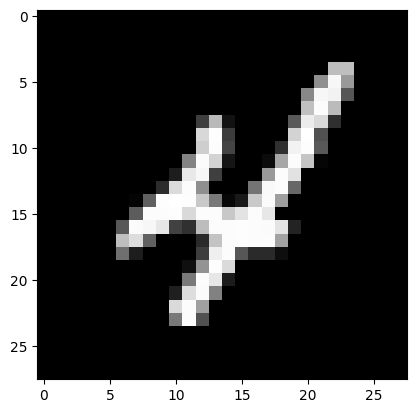

In [ ]:
plt.imshow(X_treinamento[9], cmap='gray')

In [ ]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [ ]:
X_treinamento.shape , X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [ ]:
# Normalizar e expandir dimensões
X_treinamento = X_treinamento / 255.0
X_teste = X_teste / 255.0


In [ ]:
X_treinamento.max(),X_teste.max()

(1.0, 1.0)

In [ ]:
X_treinamento.min(),X_teste.min()

(0.0, 0.0)

In [ ]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_treinamento= np_utils.to_categorical(y_treinamento,10)
y_teste= np_utils.to_categorical(y_teste,10)

In [ ]:
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
# Normalizar e expandir dimensões
#X_teste = X_teste / 255.0
#X_treinamento = X_treinamento[..., tf.newaxis]
#X_teste = X_teste[..., tf.newaxis]

# Modelo CNN simples
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size= (3,3), activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 224)            │     1,211,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214,186 (4.63 MB)

 Trainable params: 1,214,186 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar
model.fit(X_treinamento, y_treinamento, epochs=5, batch_size = 128,validation_data=(X_teste, y_teste))



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.4399 - loss: 1.7697 - val_accuracy: 0.8769 - val_loss: 0.4520
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.8667 - loss: 0.4513 - val_accuracy: 0.9067 - val_loss: 0.3142
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8990 - loss: 0.3387 - val_accuracy: 0.9219 - val_loss: 0.2635
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9132 - loss: 0.2910 - val_accuracy: 0.9300 - val_loss: 0.2283
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9238 - loss: 0.2513 - val_accuracy: 0.9410 - val_loss: 0.1968


In [ ]:
model.evaluate(X_teste,y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9322 - loss: 0.2230


[0.19684670865535736, 0.9409999847412109]

In [ ]:
# Salvar o modelo
model.save('modelo_mnist.h5')

# VALIDAÇÂO CRUZADA

In [ ]:
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier

In [ ]:
(x_treinamento,y_treinamento),(x_teste,y_teste) = mnist.load_data()
x_treinamento = x_treinamento.reshape(x_treinamento.shape[0], 28, 28, 1)
x_treinamento = x_treinamento.astype('float32')
x_treinamento = x_treinamento / 255.0
y = np_utils.to_categorical(y_treinamento,10)


In [ ]:
x_teste.shape,y_teste.shape

((10000, 28, 28), (10000,))

In [ ]:
seed = 5
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [ ]:
resultado = []
for i_treinamento,i_teste in kfold.split(x_treinamento,np.zeros(shape=(y.shape[0],1))):
  print(f"Treinamento: {i_treinamento} | Teste: {i_teste}")
  model = Sequential()
  model.add(Input(shape=(28,28,1)))
  model.add(Conv2D(32, kernel_size= (3,3), activation='relu'))

  model.add(MaxPooling2D(2,2))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  model.fit(x_treinamento[i_treinamento], y[i_treinamento], epochs=5, batch_size = 128)
  precisao=model.evaluate(x_treinamento[i_teste],y[i_teste])

  resultado.append(precisao[1])

Treinamento: [    0     1     2 ... 59997 59998 59999] | Teste: [    5     7    10 ... 59983 59985 59993]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.8365 - loss: 0.5463
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.9708 - loss: 0.0998
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.9811 - loss: 0.0651
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.9853 - loss: 0.0493
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9880 - loss: 0.0371
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9834 - loss: 0.0476
Treinamento: [    1     2     5 ... 59995 59996 59999] | Teste: [    0     3     4 ... 59989 59997 59998]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8421 - loss: 0.5425
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.9702 - loss: 0.1018
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.9811 - loss: 0.0637
Epoch 4/5
375/375

In [ ]:
np.array(resultado)

array([0.98408335, 0.98325002, 0.98474997, 0.98400003, 0.98533332])

In [ ]:
np.array(resultado).mean()

0.9842833399772644

In [ ]:
np.array(resultado).std()

0.0007082680402325221

#ARGUMENTION


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_treinamento,y_treinamento),(x_teste,y_teste) = mnist.load_data()
x_treinamento = x_treinamento.reshape(x_treinamento.shape[0], 28, 28, 1)
x_treinamento = x_treinamento.astype('float32')
x_treinamento = x_treinamento / 255.0
y = np_utils.to_categorical(y_treinamento,10)
x_teste = x_teste.reshape(x_teste.shape[0], 28, 28, 1)
x_teste = x_teste.astype('float32')
x_teste = x_teste / 255.0
y_teste = np_utils.to_categorical(y_teste, 10)

In [ ]:

argumetation_treinamento = ImageDataGenerator(
    rotation_range=7,
    horizontal_flip=True,
    shear_range=0.2,
    height_shift_range=0.07,
    zoom_range=0.2
)

argumetation_teste = ImageDataGenerator()


<function ndarray.all>

In [ ]:

base_treinamento = argumetation_treinamento.flow(x_treinamento,y,batch_size = 128)
base_teste = argumetation_teste.flow(x_teste,y_teste,batch_size = 128)

In [ ]:
model.fit(base_treinamento,epochs=5,validation_data=base_teste)

Epoch 1/5
  1/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9141 - loss: 0.2651

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9359 - loss: 0.2008 - val_accuracy: 0.9793 - val_loss: 0.0632
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9484 - loss: 0.1663 - val_accuracy: 0.9793 - val_loss: 0.0620
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9544 - loss: 0.1462 - val_accuracy: 0.9765 - val_loss: 0.0681
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9586 - loss: 0.1334 - val_accuracy: 0.9796 - val_loss: 0.0580
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9598 - loss: 0.1291 - val_accuracy: 0.9789 - val_loss: 0.0627


# A BASE DE DADOS CIFAR-10
* essa parte é sobre a base de dados e o pre-processamento rodar conforme cada label a seguir

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# Carregar os dados
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# Exibir formatos
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# Normalizar os dados
train_X = train_X.astype("float32") / 255.0
test_X = test_X.astype("float32") / 255.0

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
train_X.shape,test_X.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
import numpy as np
# Converter para tons de cinza tirando a média simples dos 3 canais
train_X_gray = np.mean(train_X, axis=-1)  # shape: (50000, 32, 32)
test_X_gray = np.mean(test_X, axis=-1)    # shape: (10000, 32, 32)

# Adicionar a dimensão do canal (reshape para: N, 32, 32, 1)
train_X_gray = train_X_gray[..., np.newaxis]
test_X_gray = test_X_gray[..., np.newaxis]


In [ ]:
train_X_gray.shape,test_X_gray.shape

((50000, 32, 32, 1), (10000, 32, 32, 1))

In [ ]:
train_X_gray.max(),train_X_gray.min()

(1.0, 0.0)

In [ ]:



# One-hot encoding das labels
train_y = np_utils.to_categorical(train_y, 10)
test_y = np_utils.to_categorical(test_y, 10)

In [ ]:
train_y.shape,test_y.shape, train_X_gray.shape, test_X_gray.shape

((50000, 10), (10000, 10), (50000, 32, 32, 1), (10000, 32, 32, 1))

# CRIAÇÃO DA CNNs SIMPLES
* Utilizando como base à pesquisa "Improving neural networks by preventing
co-adaptation of feature detectors", e com o auxilio do chatgpt-5o para automação do codigo, tradução e resumo da pesquisa, temos logo abaixo a criação do modelo de CNNs para a base de dados CIFAR-10:  
* link da pesquisa : https://arxiv.org/pdf/1207.0580  

In [ ]:
from tensorflow.keras.initializers import Orthogonal

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# --- Função para criar o modelo ---
def create_model(dropout=False):
    model = models.Sequential()

    # 1ª conv + max pooling
    model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same', input_shape=(32,32,1)))
    model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))

    # 2ª conv + average pooling
    model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(3,3), strides=2, padding='same'))

    # 3ª conv + average pooling
    model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(3,3), strides=2, padding='same'))

    if dropout:
        # 4ª camada "localmente conectada" simulada com Conv2D 3x3
        model.add(layers.Conv2D(16, (3,3), activation='relu', padding='valid'))
        model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))

    return model

# --- Treinar modelo ---
model = create_model(dropout=True)  # muda para False para versão sem dropout

optimizer = optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X_gray, train_y,
                    epochs=20,  # ajuste conforme GPU
                    batch_size=128,
                    validation_data=(test_X_gray,test_y))


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 376s 957ms/step - accuracy: 0.1223 - loss: 2.2833 - val_accuracy: 0.1966 - val_loss: 2.1218
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 389s 976ms/step - accuracy: 0.2319 - loss: 2.0404 - val_accuracy: 0.3308 - val_loss: 1.8410
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 386s 987ms/step - accuracy: 0.3303 - loss: 1.8233 - val_accuracy: 0.4004 - val_loss: 1.6479
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 379s 970ms/step - accuracy: 0.3809 - loss: 1.6994 - val_accuracy: 0.4486 - val_loss: 1.5558
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.4181 - loss: 1.6075 - val_accuracy: 0.4612 - val_loss: 1.4761
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 430s 969ms/step - accuracy: 0.4545 - loss: 1.5181 - val_accuracy: 0.5159 - val_loss: 1.3687
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 381s 967ms/step - accuracy: 0.4899 - loss: 1.4365 - val_accuracy: 0.5587 - val_loss: 1.2513
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 387s 979ms/step - accuracy: 0.5229 - lo

In [ ]:
loss, acc = model.evaluate(test_X_gray, test_y)
print(f"Acurácia no teste: {acc * 100:.2f}%")
print(f"erro no teste: {loss * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.7180 - loss: 0.8236
Acurácia no teste: 71.36%
erro no teste: 82.61%


In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'

In [ ]:
# Salva o modelo completo no formato novo
model.save('cifar10_model.keras')

# Ou apenas pesos (também pode ser .keras)
model.save_weights('cifar10.weights.h5')

# para fins de estudo de overfitting:

In [ ]:
from tensorflow.keras.models import load_model
# Carrega o modelo completo
model = load_model('cifar10_model.keras')

# Continua o treinamento
history = model.fit(train_X_gray, train_y,
                    initial_epoch=20,  # começa depois da última época
                    epochs=40,         # até onde quer ir
                    batch_size=200,
                    validation_data=(test_X_gray,test_y))

Epoch 21/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.1004 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 22/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.1015 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 23/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.1004 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 24/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.0991 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 25/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.0996 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 26/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.0990 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 27/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.1003 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 28/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.1015 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 29